# Exploratory Data Analysis (EDA)

### Objective:
### To uncover meaningful patterns, perform data cleaning, and derive actionable insights through a detailed analysis of the dataset.

### Scope:

### Identify trends and outliers

### Clean and preprocess raw data

### Visualize and interpret key statistics

### Created by: Kiran S Radhakrishnan
### Dataset Source: Uber Data Analytics – Kaggle

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [2]:
import kagglehub
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/uber-ride-analytics-dashboard


In [3]:
df = pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

In [4]:
# Let's print the top 5 from the CSV file and look for what all things we have.
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [5]:
#lets check the info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

#### There are a lot of null values. If we are trying to drop the NaN or NA values. it will significantly reduce the size of the dataset. Instead, we need to do something. 

# Data Cleaning

### We are addressing missing values in the dataframe. To maintain consistency and avoid null entries, any NaN values in these fields will be replaced with the placeholder "Unknown Reason".

## Checking Unique Values

In [6]:
df['Vehicle Type'].unique()
#There are 7 unique vechicle Types
# This column is good. which indicates all the types of vehicles.

array(['eBike', 'Go Sedan', 'Auto', 'Premier Sedan', 'Bike', 'Go Mini',
       'Uber XL'], dtype=object)

In [7]:
df['Incomplete Rides Reason'].unique()

#There are 4 unique vechicle Types

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [8]:
df['Driver Cancellation Reason'].unique()
#df['Reason for cancelling by Customer'].unique()
#df['Cancelled Rides by Customer'].unique()
#df['Cancelled Rides by Driver'].unique()
#uncomment and check the unique values of each of it.

array([nan, 'Personal & Car related issues', 'Customer related issue',
       'More than permitted people in there',
       'The customer was coughing/sick'], dtype=object)

## Filling the Dataframe with values

In [9]:
df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Reason Unkown')
df['Driver Cancellation Reason'] = df['Driver Cancellation Reason'].fillna('Reason Unkown')
df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Reason Unkown')
df['Incomplete Rides'] = df['Incomplete Rides'].fillna(0) # 0 Indicates completed Rides
df['Cancelled Rides by Customer'] = df['Cancelled Rides by Customer'].fillna(0) # 0 Indicates non cancelled Rides
df['Cancelled Rides by Driver'] = df['Cancelled Rides by Driver'].fillna(0) # 0 Indicates non cancelled Rides

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        150000 non-null  float64
 11  Reason for cancelling by Customer  1500

## Dropping Unwanted Columns

In [11]:
df = df.drop(['Driver Ratings', 'Customer Rating','Date','Booking ID','Booking Status','Customer ID'], axis=1)
# for now, let's drop these columns. And not trying to fill the value with 0, 1, or the mean.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Time                               150000 non-null  object 
 1   Vehicle Type                       150000 non-null  object 
 2   Pickup Location                    150000 non-null  object 
 3   Drop Location                      150000 non-null  object 
 4   Avg VTAT                           139500 non-null  float64
 5   Avg CTAT                           102000 non-null  float64
 6   Cancelled Rides by Customer        150000 non-null  float64
 7   Reason for cancelling by Customer  150000 non-null  object 
 8   Cancelled Rides by Driver          150000 non-null  float64
 9   Driver Cancellation Reason         150000 non-null  object 
 10  Incomplete Rides                   150000 non-null  float64
 11  Incomplete Rides Reason            1500

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Time                               150000 non-null  object 
 1   Vehicle Type                       150000 non-null  object 
 2   Pickup Location                    150000 non-null  object 
 3   Drop Location                      150000 non-null  object 
 4   Avg VTAT                           139500 non-null  float64
 5   Avg CTAT                           102000 non-null  float64
 6   Cancelled Rides by Customer        150000 non-null  float64
 7   Reason for cancelling by Customer  150000 non-null  object 
 8   Cancelled Rides by Driver          150000 non-null  float64
 9   Driver Cancellation Reason         150000 non-null  object 
 10  Incomplete Rides                   150000 non-null  float64
 11  Incomplete Rides Reason            1500

## Droping the Nan value

In [14]:
df=df.dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102000 entries, 1 to 149999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Time                               102000 non-null  object 
 1   Vehicle Type                       102000 non-null  object 
 2   Pickup Location                    102000 non-null  object 
 3   Drop Location                      102000 non-null  object 
 4   Avg VTAT                           102000 non-null  float64
 5   Avg CTAT                           102000 non-null  float64
 6   Cancelled Rides by Customer        102000 non-null  float64
 7   Reason for cancelling by Customer  102000 non-null  object 
 8   Cancelled Rides by Driver          102000 non-null  float64
 9   Driver Cancellation Reason         102000 non-null  object 
 10  Incomplete Rides                   102000 non-null  float64
 11  Incomplete Rides Reason            102000 no

### After performing data cleaning, the dataset now contains 102,000 valid data points, which is a solid sample size for analysis. Missing values were appropriately handled — some were filled with values, while others were dropped based on relevance.

# EXPLORATORY DATA ANALYSIS

## Feature Engineering
### The Time is an important factor lets divide the time into 4 Time zone
#### Zone 1: 6am to 12pm Morning
#### Zone 2: 12pm to 6pm Afternoon
#### Zone 3: 6pm to 12am Evenings
#### Zone 4: 12 am to 6 am Late nights

In [16]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [17]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [18]:
#we are using 24hr format
def getTimebyZone(Hour):
    if Hour >=6 and Hour <=12:
        return 'Morning'
    elif Hour>12 and Hour<=18:
        return 'Afternoon'
    elif Hour >18 and Hour<=24:
        return 'Evenings'
    elif Hour >=0 and Hour <6:
        return 'LateNights'
        

In [19]:
df['TimeZone'] = df['Hour'].apply(getTimebyZone)

In [20]:
#df.info()

In [21]:
df['TimeZone']

1         Afternoon
2           Morning
3         Afternoon
4          Evenings
5           Morning
            ...    
149995     Evenings
149996    Afternoon
149997      Morning
149998      Morning
149999    Afternoon
Name: TimeZone, Length: 102000, dtype: object

-

## Heatmap

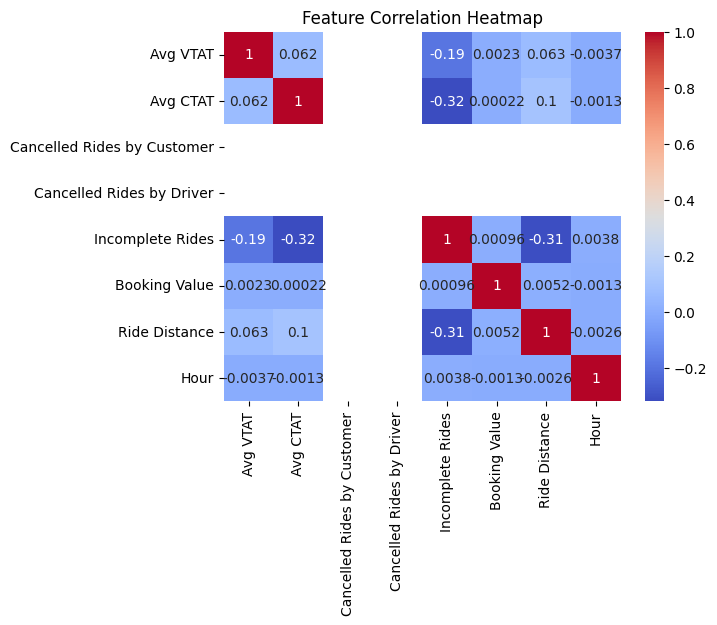

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Booking Value Distribution Across Time Zones

### To analyze how booking values vary throughout the day, we segmented the data into four time zones: Morning, Afternoon, Evening, and Late Nights.

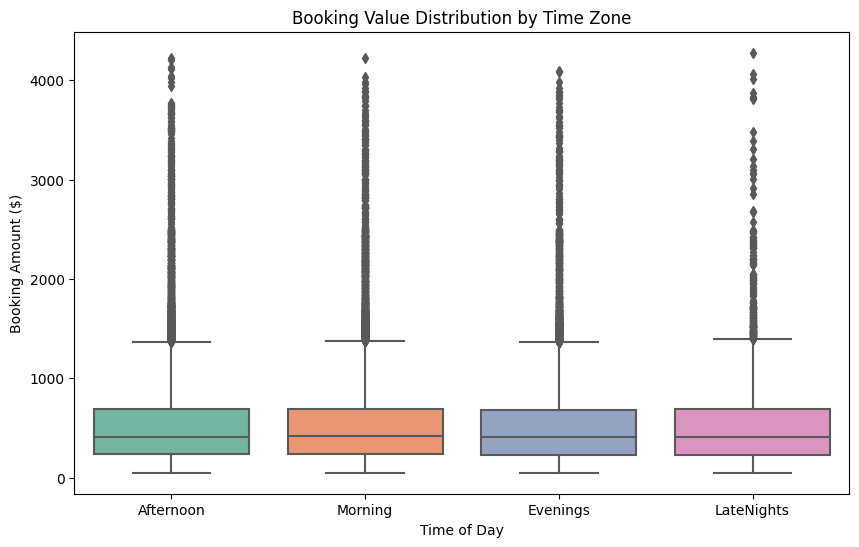

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TimeZone', y='Booking Value', data=df, palette='Set2')
plt.title("Booking Value Distribution by Time Zone")
plt.ylabel("Booking Amount ($)")
plt.xlabel("Time of Day")
plt.show()

### The boxplot below illustrates the distribution of booking amounts for each time segment. While all time zones show a similar distribution pattern, Afternoon and Morning bookings appear to have a slightly higher median value. However, all periods contain noticeable outliers, indicating the presence of high-value bookings across all time zones.

### This insight helps in understanding peak revenue-generating periods and can support dynamic pricing or promotional strategies.

## Most Active Booking Hours

### This bar chart visualizes the number of bookings across different time zones of the day.

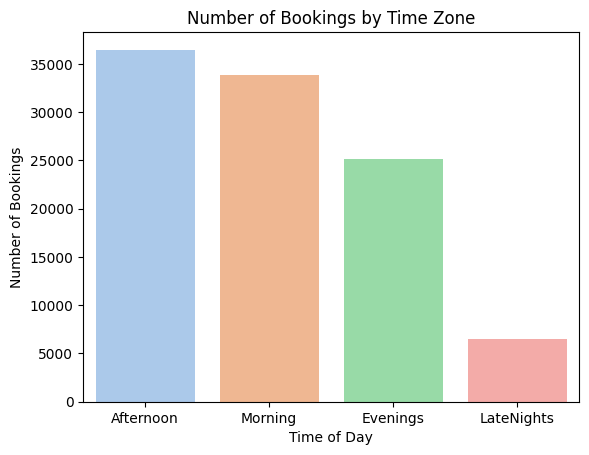

In [24]:
sns.countplot(x='TimeZone', data=df, order=df['TimeZone'].value_counts().index, palette='pastel')
plt.title("Number of Bookings by Time Zone")
plt.ylabel("Number of Bookings")
plt.xlabel("Time of Day")
plt.show()

### The afternoon time zone has the highest volume of bookings, followed by morning, with Late night having the least. This insight can help ride-hailing platforms better allocate driver availability and manage operational resources more efficiently.

## Most Preferred Uber Vehicle Types

### This bar chart shows the number of bookings for different Uber vehicle categories. Auto emerges as the most popular choice, followed by Go Mini and Go Sedan, indicating a strong preference for economical and compact transport options.

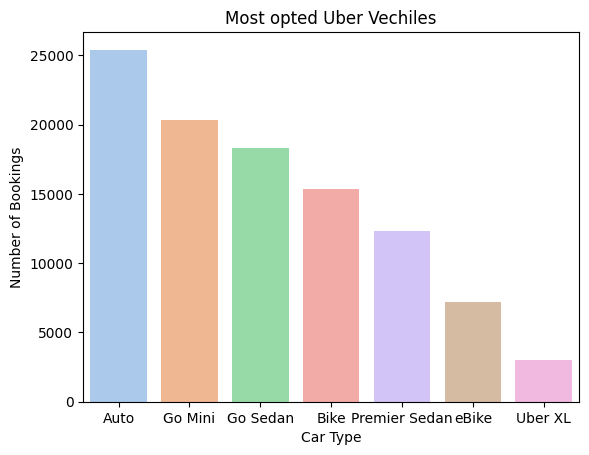

In [25]:
sns.countplot(x='Vehicle Type', data=df, order=df['Vehicle Type'].value_counts().index, palette='pastel')
plt.title("Most opted Uber Vechiles")
plt.ylabel("Number of Bookings")
plt.xlabel("Car Type")
plt.show()

## Top Pickup location vs Least Pickup Location

In [26]:
location_counts = df['Pickup Location'].value_counts()

In [27]:
top_10 = location_counts.head(5)
least_10 = location_counts.tail(5)
#location_counts
print("Top 10 location", top_10)
print("Top 10 location", least_10)

Top 10 location Pickup Location
Khandsa            662
Barakhamba Road    658
Kanhaiya Nagar     644
Madipur            644
Subhash Chowk      635
Name: count, dtype: int64
Top 10 location Pickup Location
Faridabad Sector 15    532
Arjangarh              531
Chirag Delhi           529
Old Gurgaon            527
Vinobapuri             503
Name: count, dtype: int64


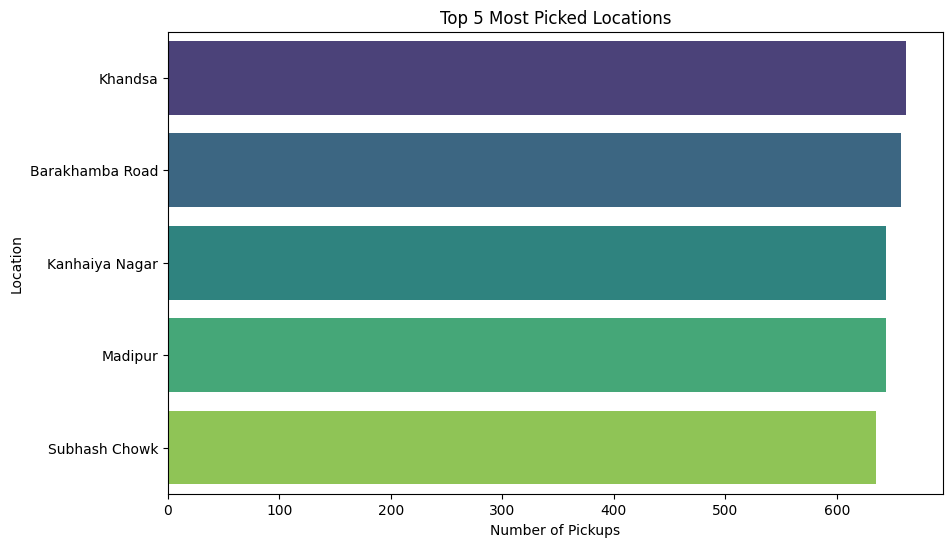

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette='viridis')
plt.title("Top 5 Most Picked Locations")
plt.xlabel("Number of Pickups")
plt.ylabel("Location")
plt.show()

### This chart highlights the five most frequently selected pickup locations by customers. Khandsa leads the list, followed closely by Barakhamba Road, Kanhaiya Nagar, Madipur, and Subhash Chowk.

### These locations likely represent key travel hubs or densely populated areas, indicating high demand zones. Such insights can help Uber optimize driver allocation and improve service efficiency in these regions.

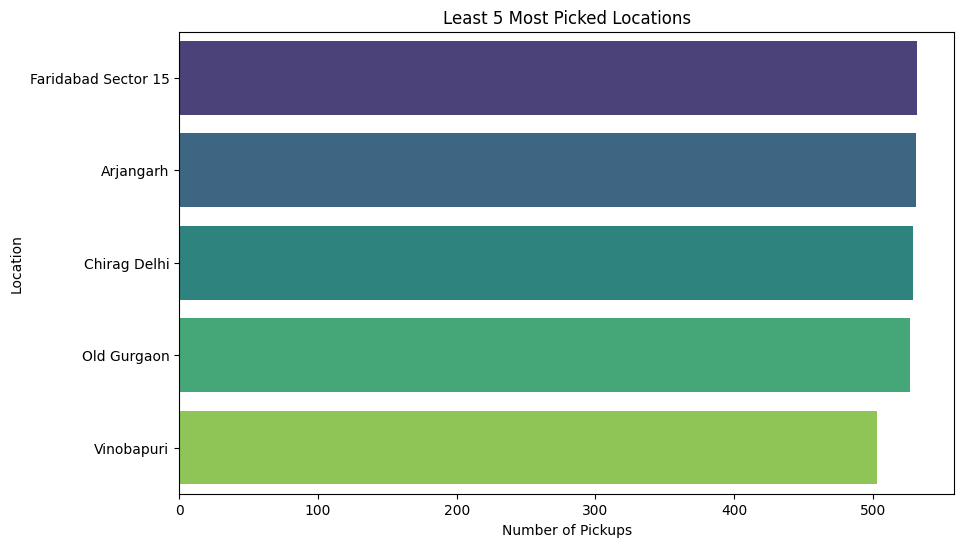

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=least_10.values, y=least_10.index, palette='viridis')
plt.title("Least 5 Most Picked Locations")
plt.xlabel("Number of Pickups")
plt.ylabel("Location")
plt.show()

### This visualization shows the five pickup points with the lowest booking counts. Faridabad Sector 15, Arjangarh, Chirag Delhi, Old Gurgaon, and Vinobapuri appear to be the least preferred or least active locations for Uber bookings.

### These areas may represent regions with lower demand, less population density, or limited Uber availability. Recognizing such zones can guide strategic expansion, marketing efforts, or fleet redistribution.

## Preferred Payment Methods for Uber Bookings

In [30]:
payment_methods = df['Payment Method'].value_counts()

In [31]:
payment_methods

Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64

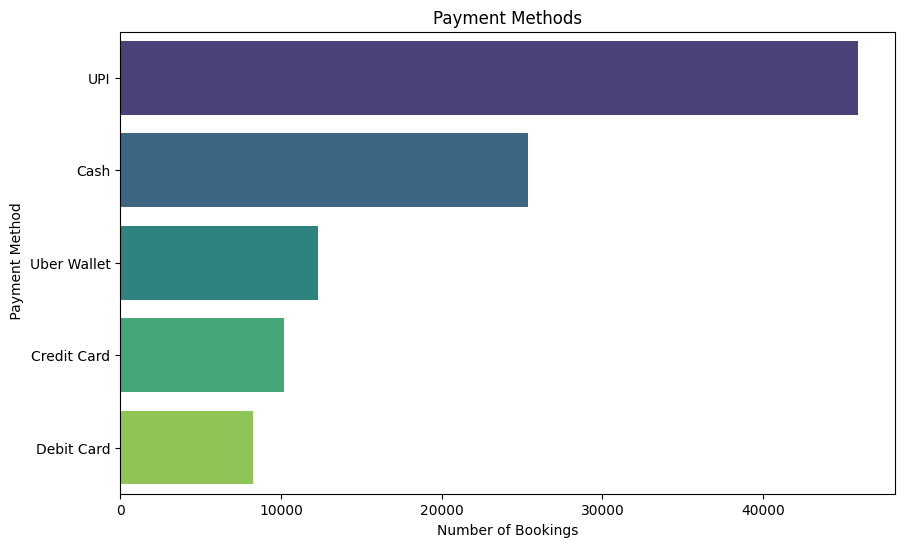

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_methods.values, y=payment_methods.index, palette='viridis')
plt.title("Payment Methods")
plt.xlabel("Number of Bookings")
plt.ylabel(" Payment Method")
plt.show()

### The majority of users prefer UPI (Unified Payments Interface) for their Uber rides, making it the most popular payment method by a significant margin. Cash payments come next, indicating a continued reliance on traditional payment methods.

### Other modes like Uber Wallet, Credit Card, and Debit Card are used by fewer users, possibly due to digital wallet preferences or ease of UPI integration.

### This insight can help Uber focus on maintaining seamless UPI support while potentially incentivizing wallet and card usage to diversify transaction channels.

## Average Time Comparison: Driver Arrival vs Trip Duration

In [33]:
#df['Avg VTAT']

In [34]:
#df['Avg CTAT']

In [35]:
avg_vtat = df['Avg VTAT'].mean()
avg_ctat = df['Avg CTAT'].mean()

print(f"Avg VTAT: {avg_vtat:.2f} minutes")
print(f"Avg CTAT: {avg_ctat:.2f} minutes")

Avg VTAT: 8.29 minutes
Avg CTAT: 29.15 minutes


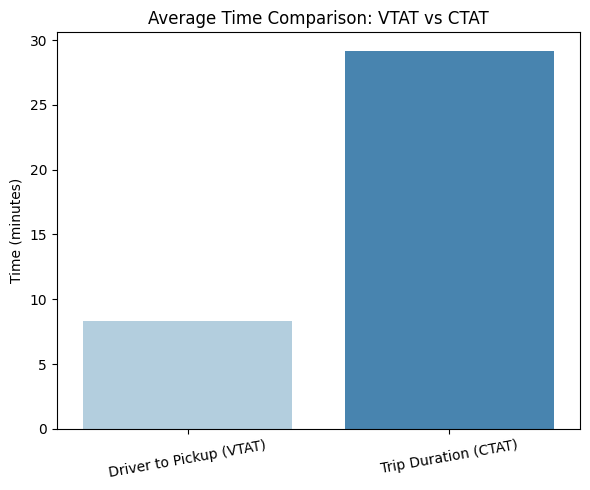

In [36]:
avg_df = pd.DataFrame({
    'Type': ['Driver to Pickup (VTAT)', 'Trip Duration (CTAT)'],
    'Avg Time (min)': [avg_vtat, avg_ctat]
})

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Type', y='Avg Time (min)', data=avg_df, palette='Blues')
plt.title("Average Time Comparison: VTAT vs CTAT")
plt.ylabel("Time (minutes)")
plt.xlabel("")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

### This chart compares two key time metrics:

### VTAT (Vehicle to Arrival Time): The average time taken by the driver to reach the pickup location is approximately 8.5 minutes.

### CTAT (Customer Trip Arrival Time): The actual trip duration from pickup to drop-off is significantly higher, averaging around 29.2 minutes.

### The data clearly shows that while driver arrival is relatively quick, the majority of time is spent in the actual ride - an important insight for understanding operational efficiency and customer time investment.

# Feature Scope

### Build a machine learning model